# Link Prediction with Mutual Information

This is a tutorial to score the probability of observing an edge using the mutual information framework based on Tan et al (2014).

Reference: Tan, F., Xia, Y. & Zhu, B. Link Prediction in Complex Networks: A Mutual Information Perspective. PLOS ONE 9, e107056 (2014).


In [1]:
import networkx as nx
import math
import itertools
import numpy as np

# Define Graph

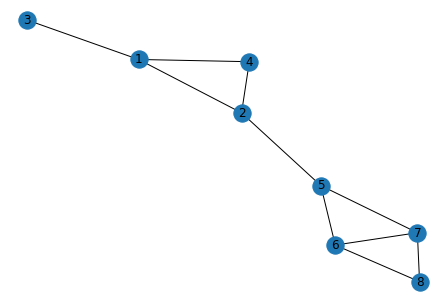

In [2]:
G = nx.Graph()
edgeList = [(1, 2),(1, 3),(1, 4),(2, 4),(2, 5),(5, 6),(5, 7),(6, 7),(6, 8),(7, 8)]
G.add_edges_from(edgeList)
nx.draw(G, with_labels=True)

# Mutual Information Framework

$ s_{xy}^{MI} = \sum_{z \in O_{xy}} \{ \frac{1}{\Gamma(z) (\Gamma(z)-1)} \sum_{m,n \in \Gamma(Z)} [- \log{p(L_{mn}^1)} + \log{p(L_{mn}^1 | z)]} \} + \log{p(L_{xy}^1)} $

In [3]:
# score based on mutual information
def s(x , y):

    # common neighbors
    CN = nx.common_neighbors(G, x, y)

    # prior (x, y)
    priorXY = - np.log2(prior(x, y, G))

    # sum over neighbors
    cnMI = 0
    for z in CN:
        # degree of z
        kz = G.degree(z)
        coeffZ = 1 / (kz * (kz-1))

        # sum over edges = neighbors of z
        zMI = 0
        for m, n in itertools.combinations(G.neighbors(z), 2):
            priorInfo = - np.log2(prior(m, n, G))
            likelihoodInfo = - np.log2(likelihood(z, G))

            # combine mutual information
            zMI += 2 * (priorInfo - likelihoodInfo)

        # add average mutual information per neighbor
        cnMI += coeffZ * zMI

    return cnMI - priorXY

# Define Model

1. prior $ p(L_{mn}^1) $
2. likelihood $ p(L_{mn}^1 | z) $



In [4]:
def prior(m, n, G):
    kn = G.degree(n)
    km = G.degree(m)
    M = G.number_of_edges()
    
    return 1 - math.comb(M-kn, km)/math.comb(M, km)

prior(4, 3, G)

0.19999999999999996

In [5]:
def likelihood(z, G):
    kz = G.degree(z)
    N_triangles = nx.triangles(G, z)
    N_triads = math.comb(kz, 2)
    
    return N_triangles / N_triads

likelihood(1, G)

0.3333333333333333

# Calculate probability of link

following example in the tutorial, we calculate the likelihood of observing edge between node $ v_2 $ and $ v_3 $ 

In [6]:
s(2, 3)

-1.6666666666666665